In [2]:
!pip install pandas numpy matplotlib seaborn prophet

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
    --------------------------------------- 0.3/11.3 MB ? eta -:--:--
    --------------------------------------- 0.3/11.3 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.3 MB 1.3 MB/s eta 0:00:08
   --- ------------------------------------ 1.0/11.3 MB 1.2 MB/s eta 0:00:09
   ---- ----------------------------------- 1.3/11.3 MB 1.4 MB/s eta 0:00:08
   ------- -------------------------------- 2.1/11.3 MB 1.8 MB/s eta 0:00:06
   ----------- ---------------------------- 3.1/11.3 MB 2.3 MB/s eta 0:00:04
   ------------ --------------------------- 3.4/11.3 MB 2.3 MB/s eta 0:00:04
   --------------- ------------------------ 4.5/11.3 MB 2.4 MB/s eta 0:00:03
   ------------------ --------------------- 5.2/11.3 MB 2.6 MB/s eta 0:00:03
   ---------------------- ----------------- 6.3/11.3 MB 2.9 MB/s eta 0:00:02
   ----------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
#AI-powered Sales forecasting Dashboard
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from prophet import Prophet
print("SetUp complete")

SetUp complete


In [10]:
df = pd.read_csv("C:\\Users\\Dell\\Desktop\\IWP\\train.csv")
print(df.head())
print(df.info())

   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB
None


In [13]:
#sum sales across stores
df_sales = df.groupby('Date')['Weekly_Sales'].sum().reset_index()

In [15]:
df_sales = df_sales.rename(columns={'Date': 'ds', 'Weekly_Sales':'y'})

In [16]:
df_sales['ds'] = pd.to_datetime(df_sales['ds'])

In [17]:
from prophet import Prophet
model = Prophet()
model.fit(df_sales)

13:11:42 - cmdstanpy - INFO - Chain [1] start processing
13:11:43 - cmdstanpy - INFO - Chain [1] done processing


In [19]:
future = model.make_future_dataframe(periods=30)  
forecast = model.predict(future)


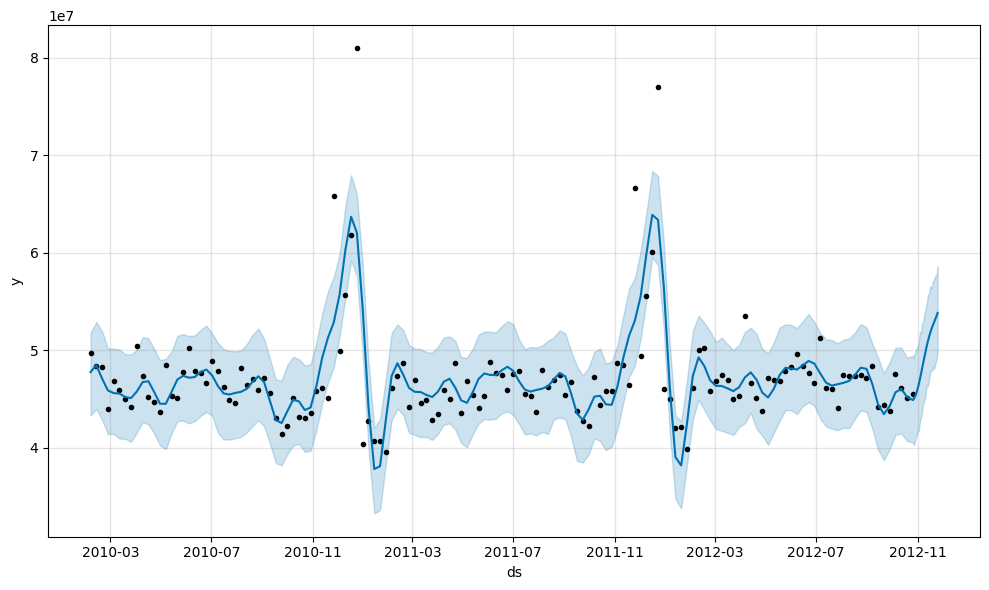

In [20]:
model.plot(forecast)
import matplotlib.pyplot as plt
plt.show()